📌Importing Libraries

In [17]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns



✅ We imported 4 popular Python libraries:

numpy – for numbers and math

pandas – to read and work with data

matplotlib.pyplot – to draw basic charts

seaborn – to make colorful and advanced charts

📌 Loading the Dataset

In [19]:
df=pd.read_csv('student_habits_performance.csv')
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


✅ We read the CSV file into a table called df.
.head() shows the first 5 rows to check what kind of data we have.

📌 Checking Data Shape and Missing Values

In [20]:
df.shape

(1000, 16)

✅ Shows total rows and columns.
Example: (1000 rows, 16 columns)

In [21]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

✅ Tells us if any column has missing values (NaN = Not a Number / Empty)

📌 Check Problem Column

In [22]:
df['parental_education_level'].value_counts(dropna=False)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64

✅ This shows how many parents have High School, Bachelor, or Master education.
It also includes the count of missing values (NaN).

📌 Fixing Missing Values

In [33]:
df['parental_education_level']=df['parental_education_level'].fillna(df['parental_education_level'].mode()[0],inplace=True)

✅ We filled missing values with the most common value (mode).
In this case, many values were "High School", so we used that.

📌 Check Again After Fix

In [24]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

✅ This checks if all missing values are gone. Now all should be 0.

🎨 Visualizations and Insights

📊 Gender Distribution

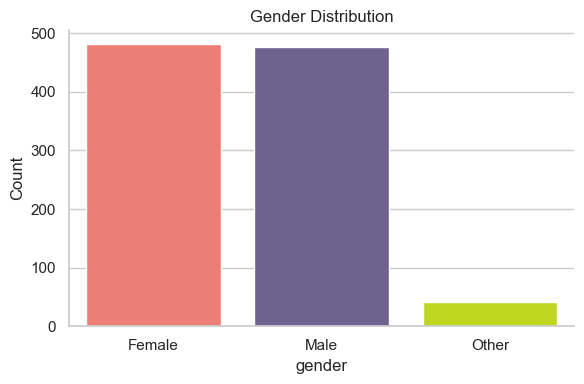

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
palette_colors=["#FF6F61", "#6B5B95","#D4F500"]
sns.countplot(x='gender',data=df,hue='gender',palette=palette_colors,legend=False)
plt.title('Gender Distribution')
plt.xlabel("gender")
plt.ylabel("Count")
sns.despine()
plt.tight_layout()
plt.show()

✅ We created a colorful bar chart to see how many male vs female students are there.

📊 Exam Score Distribution

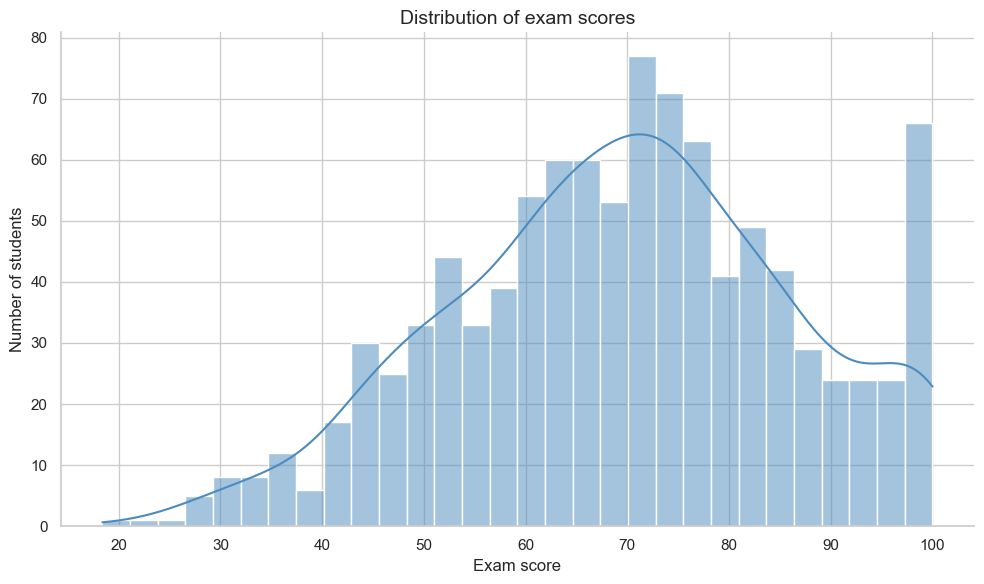

In [27]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.histplot(df["exam_score"],kde=True,bins=30,color="#4B8BBE")
plt.title("Distribution of exam scores",fontsize=14)
plt.xlabel('Exam score',fontsize=12)
plt.ylabel('Number of students',fontsize=12)

plt.tight_layout()
sns.despine()
plt.show()

✅ This chart shows how most students scored in the exam.
The smooth line (kde) helps us see the pattern.

🔥 Heatmap of Correlations

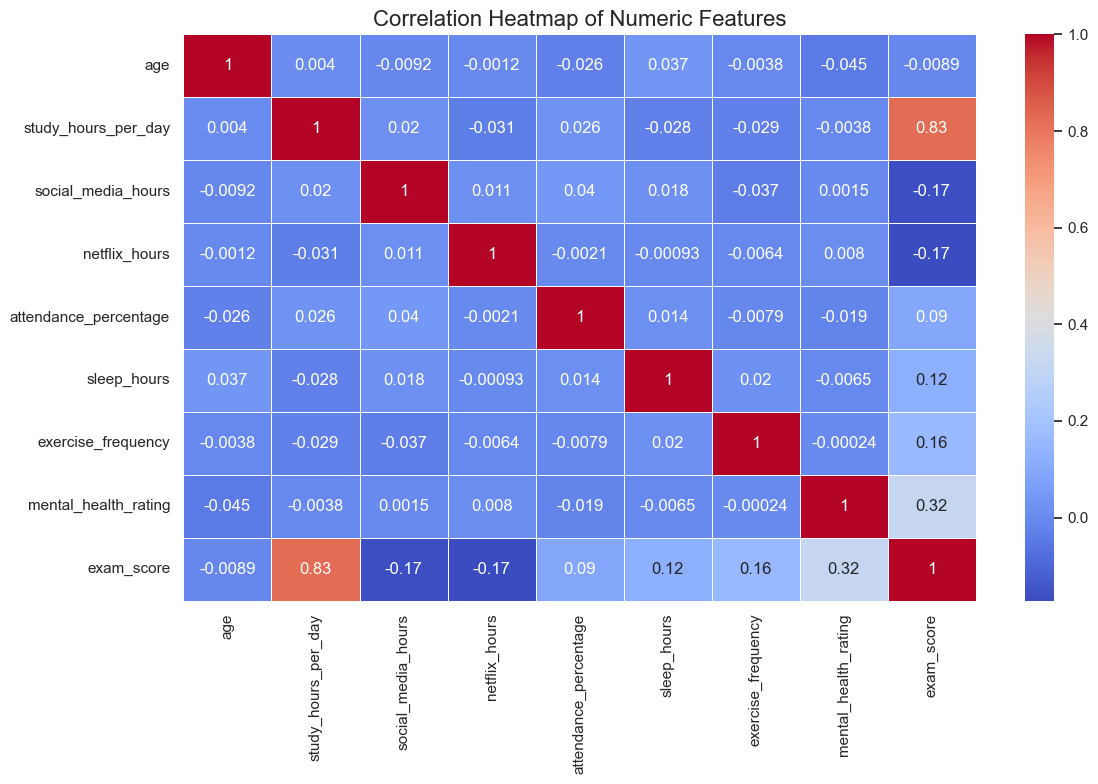

In [28]:
numeric_df= df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.set_theme(style='white')

sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features",fontsize=16)

plt.tight_layout()
plt.show()

✅ This is a heatmap — it tells us which numbers are related.
Example: More study hours = higher exam score.

📈 Study Hours vs Exam Score

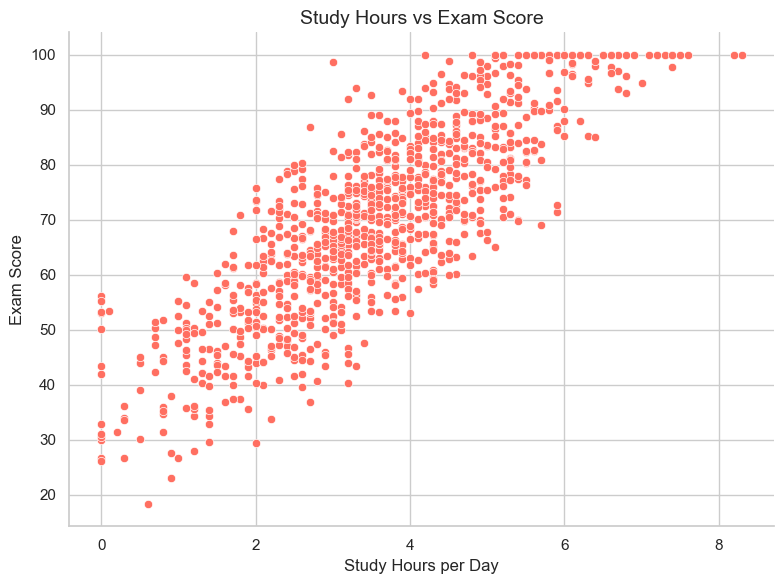

In [29]:
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')

sns.scatterplot(data=df,x='study_hours_per_day', y='exam_score', color="#FF6F61")
plt.title('Study Hours vs Exam Score', fontsize=14)
plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)

plt.tight_layout()
sns.despine()
plt.show()

✅ This dot-plot shows if studying more gives higher exam marks.
Looks like a positive relation.

📦 Boxplot by Gender

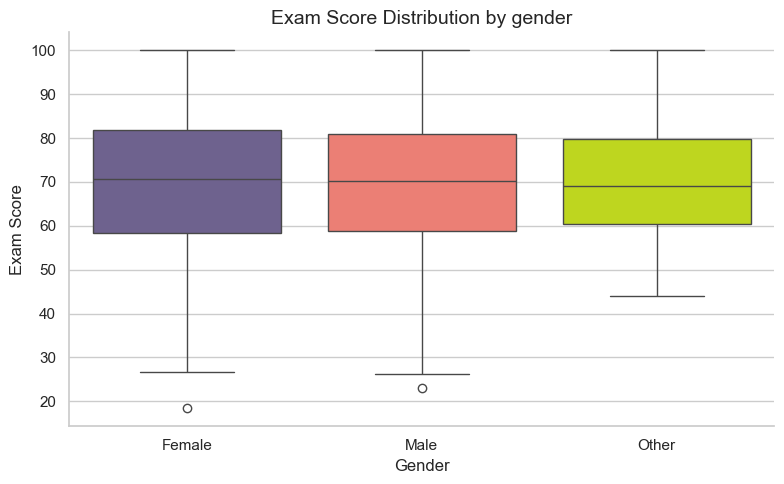

In [37]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')

sns.boxplot(x='gender',y='exam_score',data=df,hue='gender',palette=["#6B5B95", "#FF6F61","#D4F500"],legend=False)
plt.title('Exam Score Distribution by gender', fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)

plt.tight_layout()
sns.despine()
plt.show()

✅ This chart shows score range for each gender — helps compare performance.

📊 Exam Score by Part-Time Job

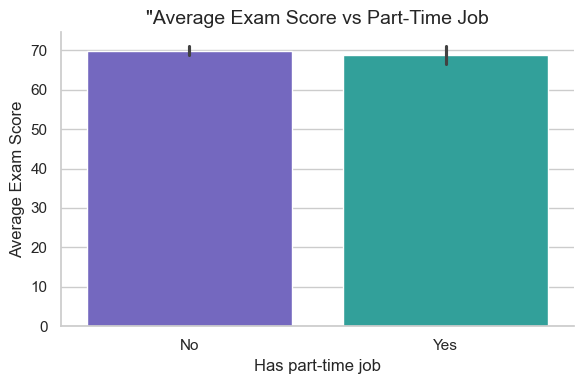

In [38]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(6,4))

sns.barplot(x="part_time_job",y="exam_score",hue='part_time_job',data=df,palette=["#6A5ACD", "#20B2AA"],legend=False)
plt.title('"Average Exam Score vs Part-Time Job', fontsize=14)
plt.xlabel('Has part-time job', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)

plt.tight_layout()
sns.despine()
plt.show()

✅ This tells us if having a part-time job affects exam scores.

💾 Save Cleaned Data

In [32]:
df.to_csv("Students_data_analysis.csv", index=False)

✅ Saved the cleaned data to a new CSV file — so we don’t lose our work.